<a href="https://colab.research.google.com/github/rz0718/Bayesian-Neural-Network/blob/master/Mutlivariate_Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebooks will provide more details on Multivariate Guassians.


1. The defintion of Multivariate Gaussian

$p(x;u,{\Sigma})=\frac{1}{(2{\pi})^{d/2}{\Sigma}^{1/2}}exp(-\frac{(x-u)^T\Sigma(x-u)}{2})$. 

Here:
* x is a vector-based random variable $x\in\mathbb{R}^d$.
* $\Sigma\in\mathbb{R}_{++}^d$ is the symmetric and positive definite covariance matrix

How to sample the multivariate gaussian? 
1. Numpy package has a build-in multivariate normal sampling function

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Define dimension. 
d = 2
# Set mean vector. 
m = np.array([1.5, 2.5]).reshape(2, 1)
# Set covariance function. 
Sigma_0 = np.array([[4, 1],
                [1, 2]])

In [6]:
# Number of samples
n = 100000
z = np.random.multivariate_normal(mean=m.reshape(d,), cov=Sigma_0, size=n)
y = np.transpose(z)

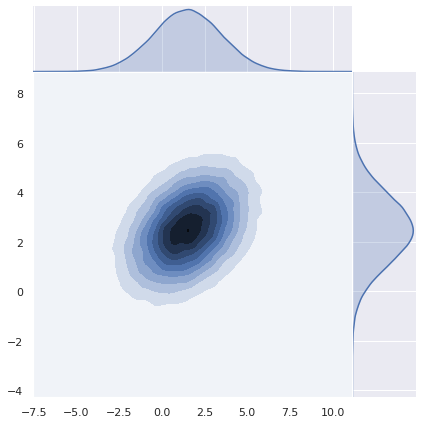

In [7]:
# Plot density function.
sns.jointplot(x=y[0],
              y=y[1], 
              kind="kde", 
              space=0);

2. Based on Cholesky Decompsition (starting from $x\sim{N(0, I)}$)

* 2.1
We want to compute the Cholesky decomposition of the covariance matrix $\mathbf{\Sigma}$. It means $\mathbf{\Sigma}=\mathbf{L}\mathbf{L}^T$. Regarding numberical stability:

In practice it may be necessary to add a small multiple of the identity matrix 
εI to the covariance matrix for numerical reasons. This is because the eigenvalues of the matrix $\mathbf{\Sigma}$ can decay very rapidly and without this stabilization the Cholesky decomposition fails. The effect on the generated samples is to add additional independent noise of variance 
ε. From the context ε can usually be chosen to have inconsequential effects on the samples, while ensuring numerical stability.

* 2.2
Generate Independent Samples $x\sim{N(0, I)}$

* 2.3

Compute $\mathbf{x}=\mathbf{m}+\mathbf{L}\mathbf{u}$
The variable x=m+Lu has a multivariate normal distribution since it is a linear combination of **independent** normally distributed variables. Moreover,
$E(x)=E(m+Lu)=m+LE(u)=m$

$E(xx^T)=E(mm^T)+E(mu^TL^T)+E(Lum^T)+E(Luu^TL^T)=$.

Hence, $E((x-m)(x-m)^T)=\Sigma$


In [8]:
# Define epsilon.
epsilon = 0.0001

# Add small pertturbation. 
Sigma = Sigma_0 + epsilon*np.identity(d)

In [9]:
L = np.linalg.cholesky(Sigma)

In [10]:
# Number of samples
n = 100000
u = np.random.normal(loc=0, scale=1, size=d*n).reshape(d, n)

In [11]:
x = m + np.dot(L, u)

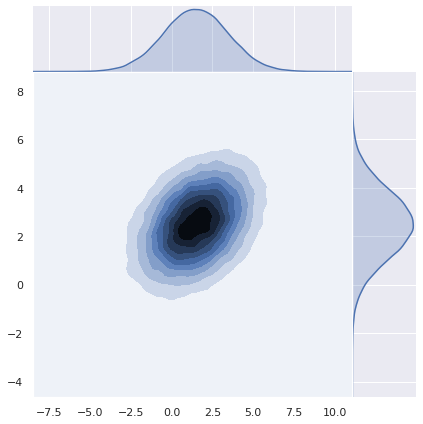

In [12]:
sns.jointplot(x=x[0],
              y=x[1], 
              kind="kde", 
              space=0)